In [2]:
import torch
import numpy as np
from utils import DataLoader, MultiFeatureDataset, collate_fn
from models import BertRegressionModel
from torch.utils.data import DataLoader as TorchDataLoader
from utils.metrics import evaluate_model
from matplotlib import pyplot as plt

In [3]:
import logging
logging.basicConfig(level=logging.INFO)

In [4]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [5]:
dl = DataLoader(
    benchmark="benchmark_1",
    split=None,
    embedding="bert_cls", 
    max_len=64,
    include_axes=True,
    shuffle_axes=False,  
    normalization="zscore"
)

INFO:utils.dataloader:Initializing DataLoader...
INFO:utils.dataloader:Using device: cuda
INFO:utils.dataloader:Loading dataset for benchmark benchmark_1 with split None
INFO:utils.dataloader:No split specified; loading all splits (train, validation, test).
INFO:utils.dataloader:Dataset loaded successfully.
INFO:utils.dataloader:Initializing embedding for method bert_cls...
INFO:utils.dataloader:Initialized BERT model and tokenizer.
INFO:utils.dataloader:Embedding resources initialized.


In [6]:
train_dataset = MultiFeatureDataset(dl.dataset["train"], tokenizer, max_len=64)
valid_dataset = MultiFeatureDataset(dl.dataset["validation"], tokenizer, max_len=64)
test_dataset  = MultiFeatureDataset(dl.dataset["test"], tokenizer, max_len=64)

In [7]:
train_loader = TorchDataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
valid_loader = TorchDataLoader(valid_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)
test_loader  = TorchDataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [22]:
grid_params = {"dropout": [0, 0.2, 0.4]}
lr = 1e-4
epochs = 10

In [23]:
dummy_model = BertRegressionModel(dropout=0.1)

INFO:models.bert_regression:BERT Regression model built with dropout=0.1 and regressor input dim=6912


INFO:models.bert_regression:Grid search: dropout=0, lr=0.0001
INFO:models.bert_regression:BERT Regression model built with dropout=0 and regressor input dim=6912
INFO:models.bert_regression:BERT Regressor Epoch 1/10 - Train Loss: 262.9839 - Val Loss: 158.1808
INFO:models.bert_regression:BERT Regressor Epoch 2/10 - Train Loss: 141.2949 - Val Loss: 157.1384
INFO:models.bert_regression:BERT Regressor Epoch 3/10 - Train Loss: 142.4592 - Val Loss: 157.8362
INFO:models.bert_regression:BERT Regressor Epoch 4/10 - Train Loss: 141.6208 - Val Loss: 158.1410
INFO:models.bert_regression:BERT Regressor Epoch 5/10 - Train Loss: 145.0813 - Val Loss: 157.5550
INFO:models.bert_regression:BERT Regressor Epoch 6/10 - Train Loss: 143.1063 - Val Loss: 158.3673
INFO:models.bert_regression:BERT Regressor Epoch 7/10 - Train Loss: 141.6233 - Val Loss: 158.5488
INFO:models.bert_regression:BERT Regressor Epoch 8/10 - Train Loss: 142.0808 - Val Loss: 157.3495
INFO:models.bert_regression:BERT Regressor Epoch 9/10 

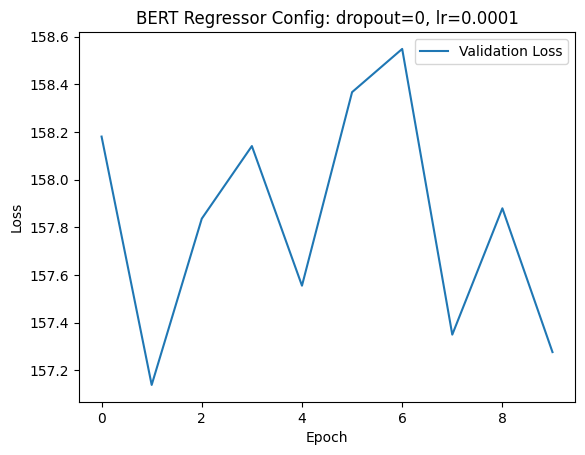

INFO:models.bert_regression:Grid search: dropout=0.2, lr=0.0001
INFO:models.bert_regression:BERT Regression model built with dropout=0.2 and regressor input dim=6912
INFO:models.bert_regression:BERT Regressor Epoch 1/10 - Train Loss: 278.5039 - Val Loss: 158.3647
INFO:models.bert_regression:BERT Regressor Epoch 2/10 - Train Loss: 141.1890 - Val Loss: 157.7045
INFO:models.bert_regression:BERT Regressor Epoch 3/10 - Train Loss: 141.7394 - Val Loss: 159.6652
INFO:models.bert_regression:BERT Regressor Epoch 4/10 - Train Loss: 143.2738 - Val Loss: 157.2335
INFO:models.bert_regression:BERT Regressor Epoch 5/10 - Train Loss: 142.4235 - Val Loss: 158.9669
INFO:models.bert_regression:BERT Regressor Epoch 6/10 - Train Loss: 142.0390 - Val Loss: 157.2506
INFO:models.bert_regression:BERT Regressor Epoch 7/10 - Train Loss: 143.1689 - Val Loss: 159.0504
INFO:models.bert_regression:BERT Regressor Epoch 8/10 - Train Loss: 142.4495 - Val Loss: 157.3481
INFO:models.bert_regression:BERT Regressor Epoch 9

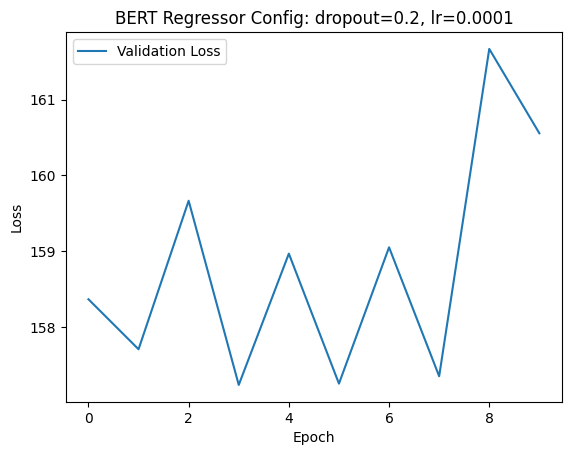

INFO:models.bert_regression:Grid search: dropout=0.4, lr=0.0001
INFO:models.bert_regression:BERT Regression model built with dropout=0.4 and regressor input dim=6912
INFO:models.bert_regression:BERT Regressor Epoch 1/10 - Train Loss: 288.8776 - Val Loss: 157.5149
INFO:models.bert_regression:BERT Regressor Epoch 2/10 - Train Loss: 140.5959 - Val Loss: 155.1900
INFO:models.bert_regression:BERT Regressor Epoch 3/10 - Train Loss: 147.3284 - Val Loss: 157.6491
INFO:models.bert_regression:BERT Regressor Epoch 4/10 - Train Loss: 142.0476 - Val Loss: 157.1494
INFO:models.bert_regression:BERT Regressor Epoch 5/10 - Train Loss: 143.3682 - Val Loss: 157.3224
INFO:models.bert_regression:BERT Regressor Epoch 6/10 - Train Loss: 141.2881 - Val Loss: 157.1695
INFO:models.bert_regression:BERT Regressor Epoch 7/10 - Train Loss: 142.8525 - Val Loss: 157.4821
INFO:models.bert_regression:BERT Regressor Epoch 8/10 - Train Loss: 142.9741 - Val Loss: 157.1324
INFO:models.bert_regression:BERT Regressor Epoch 9

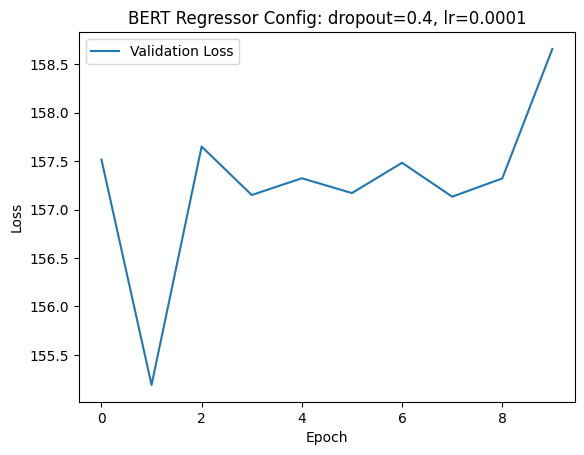

Best Hyperparameters: {'dropout': 0, 'lr': 0.0001}


In [24]:
best_model, best_params, train_losses, valid_losses = dummy_model.grid_search(
    train_loader, valid_loader, grid_params=grid_params, epochs=epochs, lr=lr, device=device
)

print("Best Hyperparameters:", best_params)

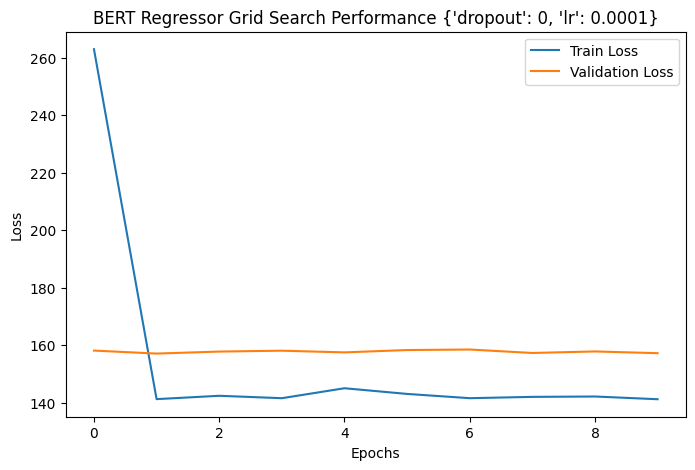

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"BERT Regressor Grid Search Performance {best_params}")
plt.legend()
plt.savefig("plots/benchmark_1/bert_regressor_grid_search.pdf")
plt.show()

In [26]:
best_model.eval()
with torch.no_grad():
    preds_list = []
    for batch in test_loader:
        preds = best_model(batch["input_ids"], batch["attention_masks"])
        preds_list.append(preds.cpu().numpy())
    test_preds = np.vstack(preds_list)

y_test = np.array([sample["targets"].numpy() for sample in test_dataset])

In [10]:
mse, mae, r2, nll, crps, pearson_corr, spearman_corr = evaluate_model(y_test, test_preds)
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, NLL: {nll:.4f}, CRPS: {crps:.4f}, Pearson: {pearson_corr:.4f}, Spearman: {spearman_corr:.4f}")

MSE: 145.8611, MAE: 6.7570, R2: -0.0090, NLL: 3.9103, CRPS: 6.7570, Pearson: -0.0282, Spearman: -0.0485


In [28]:
save_path = "baseline_weights/benchmark_1/bert_regressor.pth"
best_model.save(save_path)

INFO:models.bert_regression:BERT Regressor model saved to baseline_weights/benchmark_1/bert_regressor.pth
